In [33]:
%pip install qiskit ipywidgets
%pip install matplotlib
%pip install pylatexenc

  Using cached qiskit_terra-0.24.1-cp310-cp310-win_amd64.whl (5.0 MB)
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.25.0
    Uninstalling qiskit-terra-0.25.0:
      Successfully uninstalled qiskit-terra-0.25.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-provider 0.6.2 requires qiskit-terra>=0.24.2, but you have qiskit-terra 0.24.1 which is incompatible.
You should consider upgrading via the 'c:\Users\fouad\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\fouad\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\fouad\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [34]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
#from qiskit.primitives 
from qiskit import Aer, transpile, assemble
import math
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import qiskit.tools.jupyter
%qiskit_version_table
vers_qis = qiskit.__qiskit_version__['qiskit']
SAMPLING = True

In [35]:
def apply_fixed_ansatz(qubits, parameters):

    for iz in range (0, len(qubits)):
        circ.ry(parameters[0][iz], qubits[iz])

    circ.cz(qubits[0], qubits[1])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[1][iz], qubits[iz])

    circ.cz(qubits[1], qubits[2])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[2][iz], qubits[iz])

circ = QuantumCircuit(3)
apply_fixed_ansatz([0, 1, 2], [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ])
circ.draw()

┌───────┐      ┌───────┐      ┌───────┐
q_0: ┤ Ry(1) ├─■──■─┤ Ry(1) ├────■─┤ Ry(1) ├
     ├───────┤ │  │ ├───────┤    │ ├───────┤
q_1: ┤ Ry(1) ├─■──┼─┤ Ry(1) ├─■──┼─┤ Ry(1) ├
     ├───────┤    │ ├───────┤ │  │ ├───────┤
q_2: ┤ Ry(1) ├────■─┤ Ry(1) ├─■──■─┤ Ry(1) ├
     └───────┘      └───────┘      └───────┘

In [36]:
# Creates the Hadamard test

def had_test(gate_type, qubits, auxiliary_index, parameters):

    circ.h(auxiliary_index)

    apply_fixed_ansatz(qubits, parameters)

    for ie in range (0, len(gate_type[0])):
        if (gate_type[0][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])

    for ie in range (0, len(gate_type[1])):
        if (gate_type[1][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])
    
    circ.h(auxiliary_index)
    
circ = QuantumCircuit(4)
had_test([ [0, 0, 0], [0, 0, 1] ], [1, 2, 3], 0, [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ])
circ.draw()

┌───┐                                   ┌───┐
q_0: ──┤ H ├─────────────────────────────────■─┤ H ├
     ┌─┴───┴─┐      ┌───────┐      ┌───────┐ │ └───┘
q_1: ┤ Ry(1) ├─■──■─┤ Ry(1) ├────■─┤ Ry(1) ├─┼──────
     ├───────┤ │  │ ├───────┤    │ ├───────┤ │      
q_2: ┤ Ry(1) ├─■──┼─┤ Ry(1) ├─■──┼─┤ Ry(1) ├─┼──────
     ├───────┤    │ ├───────┤ │  │ ├───────┤ │      
q_3: ┤ Ry(1) ├────■─┤ Ry(1) ├─■──■─┤ Ry(1) ├─■──────
     └───────┘      └───────┘      └───────┘

In [37]:
# Creates controlled anstaz for calculating |<b|psi>|^2 with a Hadamard test

def control_fixed_ansatz(qubits, parameters, auxiliary, reg):

    for i in range (0, len(qubits)):
        circ.cry(parameters[0][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

    circ.ccx(auxiliary, qubits[1], 4)
    circ.cz(qubits[0], 4)
    circ.ccx(auxiliary, qubits[1], 4)

    circ.ccx(auxiliary, qubits[0], 4)
    circ.cz(qubits[2], 4)
    circ.ccx(auxiliary, qubits[0], 4)

    for i in range (0, len(qubits)):
        circ.cry(parameters[1][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

    circ.ccx(auxiliary, qubits[2], 4)
    circ.cz(qubits[1], 4)
    circ.ccx(auxiliary, qubits[2], 4)

    circ.ccx(auxiliary, qubits[0], 4)
    circ.cz(qubits[2], 4)
    circ.ccx(auxiliary, qubits[0], 4)

    for i in range (0, len(qubits)):
        circ.cry(parameters[2][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

q_reg = QuantumRegister(5)
circ = QuantumCircuit(q_reg)
control_fixed_ansatz([1, 2, 3], [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ], 0, q_reg)
circ.draw()

»
q331_0: ────■────────■────────■──────■───────■────■───────■──────■────────■────»
        ┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐    │    »
q331_1: ┤ Ry(1) ├────┼────────┼──────┼───■───┼────■───────■──┤ Ry(1) ├────┼────»
        └───────┘┌───┴───┐    │      │   │   │    │       │  └───────┘┌───┴───┐»
q331_2: ─────────┤ Ry(1) ├────┼──────■───┼───■────┼───────┼───────────┤ Ry(1) ├»
                 └───────┘┌───┴───┐  │   │   │    │       │           └───────┘»
q331_3: ──────────────────┤ Ry(1) ├──┼───┼───┼────┼───■───┼────────────────────»
                          └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  »
q331_4: ───────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├──────────────────»
                                   └───┘   └───┘└───┘   └───┘                  »
«                                                                      
«q331_0: ────■──────■───────■────■───────■──────■────────■────────■────
«            │      │       │    │       │  ┌───┴───┐    │        │    
«q331_1: ────┼──────┼───────┼────■───────■──┤ Ry(1) ├────┼────────┼────
«            │      │       │    │       │  └───────┘┌───┴───┐    │    
«q331_2: ────┼──────┼───■───┼────┼───────┼───────────┤ Ry(1) ├────┼────
«        ┌───┴───┐  │   │   │    │       │           └───────┘┌───┴───┐
«q331_3: ┤ Ry(1) ├──■───┼───■────┼───■───┼────────────────────┤ Ry(1) ├
«        └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  └───────┘
«q331_4: ─────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├───────────────────────────
«                 └───┘   └───┘└───┘   └───┘

In [38]:
def control_b(auxiliary, qubits):

    for ia in qubits:
        circ.ch(auxiliary, ia)

circ = QuantumCircuit(4)
control_b(0, [1, 2, 3])
circ.draw()

q_0: ──■────■────■──
     ┌─┴─┐  │    │  
q_1: ┤ H ├──┼────┼──
     └───┘┌─┴─┐  │  
q_2: ─────┤ H ├──┼──
          └───┘┌─┴─┐
q_3: ──────────┤ H ├
               └───┘

In [39]:
# Create the controlled Hadamard test, for calculating <psi|psi>

def special_had_test(gate_type, qubits, auxiliary_index, parameters, reg):

    circ.h(auxiliary_index)

    control_fixed_ansatz(qubits, parameters, auxiliary_index, reg)

    for ty in range (0, len(gate_type)):
        if (gate_type[ty] == 1):
            circ.cz(auxiliary_index, qubits[ty])


    control_b(auxiliary_index, qubits)
    
    circ.h(auxiliary_index)

q_reg = QuantumRegister(5)
circ = QuantumCircuit(q_reg)
special_had_test([ [0, 0, 0], [0, 0, 1] ], [1, 2, 3], 0, [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ], q_reg)
circ.draw()

┌───┐                                                              »
q332_0: ┤ H ├────■────────■────────■──────■───────■────■───────■──────■────»
        └───┘┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐»
q332_1: ─────┤ Ry(1) ├────┼────────┼──────┼───■───┼────■───────■──┤ Ry(1) ├»
             └───────┘┌───┴───┐    │      │   │   │    │       │  └───────┘»
q332_2: ──────────────┤ Ry(1) ├────┼──────■───┼───■────┼───────┼───────────»
                      └───────┘┌───┴───┐  │   │   │    │       │           »
q332_3: ───────────────────────┤ Ry(1) ├──┼───┼───┼────┼───■───┼───────────»
                               └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐         »
q332_4: ────────────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├─────────»
                                        └───┘   └───┘└───┘   └───┘         »
«                                                                      »
«q332_0: ────■────────■──────■───────■────■───────■──────■────────■────»
«            │        │      │       │    │       │  ┌───┴───┐    │    »
«q332_1: ────┼────────┼──────┼───────┼────■───────■──┤ Ry(1) ├────┼────»
«        ┌───┴───┐    │      │       │    │       │  └───────┘┌───┴───┐»
«q332_2: ┤ Ry(1) ├────┼──────┼───■───┼────┼───────┼───────────┤ Ry(1) ├»
«        └───────┘┌───┴───┐  │   │   │    │       │           └───────┘»
«q332_3: ─────────┤ Ry(1) ├──■───┼───■────┼───■───┼────────────────────»
«                 └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  »
«q332_4: ──────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├──────────────────»
«                          └───┘   └───┘└───┘   └───┘                  »
«                                ┌───┐
«q332_0: ────■──────■────■────■──┤ H ├
«            │    ┌─┴─┐  │    │  └───┘
«q332_1: ────┼────┤ H ├──┼────┼───────
«            │    └───┘┌─┴─┐  │       
«q332_2: ────┼─────────┤ H ├──┼───────
«        ┌───┴───┐     └───┘┌─┴─┐     
«q332_3: ┤ Ry(1) ├──────────┤ H ├─────
«        └───────┘          └───┘     
«q332_4: ─────────────────────────────
«

In [40]:
# Implements the entire cost function on the quantum circuit

# number of shots to use in circuit for sampling
SHOTS = 100000

def calculate_cost_function(parameters):
    
    global opt,current_cost

    overall_sum_1 = 0
    
    parameters = [parameters[0:3], parameters[3:6], parameters[6:9] ]

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            global circ

            qctl = QuantumRegister(5)
            if SAMPLING:
               qc = ClassicalRegister(1)
            else:
              qc = ClassicalRegister(5)
            circ = QuantumCircuit(qctl, qc)

            backend = Aer.get_backend('aer_simulator')
            
            multiply = coefficient_set[i]*coefficient_set[j]

            had_test([gate_set[i], gate_set[j] ], [1, 2, 3], 0, parameters)

            if SAMPLING:
              circ.measure(0,0)
            else:
              circ.save_statevector()

            t_circ = transpile(circ, backend)
            if SAMPLING:
              qobj = assemble(t_circ,  shots=SHOTS )
            else:
              qobj = assemble(t_circ)
            

            job = backend.run(qobj)
            
            result = job.result()

            if SAMPLING:
              outputstate = result.get_counts(circ)
            else:
              outputstate = np.real(result.get_statevector(circ, decimals=100))
            o = outputstate

            
            if SAMPLING:
              if ('1' in outputstate.keys()):
                m_sum = float(outputstate["1"])/SHOTS
              else:
                 m_sum = 0
            
            else:
              m_sum = 0
              for l in range (0, o.size):
                  if (l%2 == 1):
                      n = o[l]**2
                      m_sum+=n

            overall_sum_1+=multiply*(1-(2*m_sum))

    overall_sum_2 = 0

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            multiply = coefficient_set[i]*coefficient_set[j]
            mult = 1

            for extra in range(0, 2):

                qctl = QuantumRegister(5)
                if SAMPLING:
                   qc = ClassicalRegister(1)
                else:
                  qc = ClassicalRegister(5)
                circ = QuantumCircuit(qctl, qc)

                backend = Aer.get_backend('aer_simulator')

                if (extra == 0):
                    special_had_test(gate_set[i], [1, 2, 3], 0, parameters, qctl)
                if (extra == 1):
                    special_had_test(gate_set[j], [1, 2, 3], 0, parameters, qctl)

                if SAMPLING:
                   circ.measure(0,0)
                else:
                  circ.save_statevector()
                
                t_circ = transpile(circ, backend)
                if SAMPLING:
                   qobj = assemble(t_circ, shots=SHOTS)
                else:
                  qobj = assemble(t_circ)
                
                job = backend.run(qobj, )
                  
                result = job.result()

                if SAMPLING:
                  outputstate = result.get_counts(circ)
                else:
                  outputstate = np.real(result.get_statevector(circ, decimals=100))
                o = outputstate

                if SAMPLING:
                   if ('1' in outputstate.keys()):
                      m_sum = float(outputstate["1"])/SHOTS
                   else:
                      m_sum = 0
                else:
                  m_sum = 0
                  for l in range (0, o.size):
                      if (l%2 == 1):
                          n = o[l]**2
                          m_sum+=n
                
                mult = mult*(1-(2*m_sum))

            overall_sum_2+=multiply*mult
            
    print(1-float(overall_sum_2/overall_sum_1))
    current_cost = 1-float(overall_sum_2/overall_sum_1)

    #return 1-float(overall_sum_2/overall_sum_1)
    return current_cost

In [41]:
# creating and storing random k, for later reproduceability
k  = [float(random.randint(0,3000))/1000 for i in range(0, 9)]

In [48]:
def log_cost(x):
  cost_values.append(current_cost)

optimizers = ["COBYLA", "CG", "BFGS", "L-BFGS-B", "SLSQP", ]
optimizers =["COBYLA", "SLSQP", ][:1]

coefficient_set = [0.55, 0.45]
gate_set = [ [0, 0, 0], [0, 0, 1] ]

max_iter = 200
cost_sum = np.zeros((len(optimizers), max_iter+1))
opt_iter = 1
nqubits = 3
anci_bits = 3

accuracy = []

for j in range(opt_iter):
  for i in range(len(optimizers)):
    cost_values = [] 
    out = minimize(calculate_cost_function, x0=k, method=optimizers[i], options={'maxiter':max_iter}, callback=log_cost)
    print(out)

    proper_index = 0
    for element in np.array(cost_values):
      cost_sum[i][proper_index] += element
      proper_index += 1
    
    out_f = [out['x'][0:3], out['x'][3:6], out['x'][6:9] ]

    circ = QuantumCircuit(nqubits, anci_bits)
    apply_fixed_ansatz([0, 1, 2], out_f)

    if SAMPLING:
      circ.measure(0,0)
    else:
      circ.save_statevector()

    backend = Aer.get_backend('aer_simulator')
    t_circ = transpile(circ, backend)
    qobj = assemble(t_circ, )
    job = backend.run(qobj)

    result = job.result()

    if SAMPLING:
      o - result.get_counts(circ)
    else:
      o = result.get_statevector(circ, decimals=10)

    #a1 = coefficient_set[1]*np.array([ [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,-1,0,0,0], [0,0,0,0,0,-1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1] ])
    #a2 = coefficient_set[0]*np.array([ [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1] ])
    #b = np.array([float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8))])

    Z = np.array([[1,0], [0,-1]])
    I = np.identity(2)
    a2 = coefficient_set[0]*np.identity(2**nqubits)
    a1 = coefficient_set[1]*np.kron(np.kron(Z,I),I)
    b = np.ones(2**nqubits)/np.sqrt(2**nqubits)

    a3 = np.add(a1, a2)

    accuracy_result = (b.dot(a3.dot(o)/(np.linalg.norm(a3.dot(o)))))**2
    print(accuracy_result)
    accuracy += [accuracy_result]


C:\Users\fouad\AppData\Local\Temp\ipykernel_4544\2594852343.py:44: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)
C:\Users\fouad\AppData\Local\Temp\ipykernel_4544\2594852343.py:105: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj, )


0.9507966708293087
0.9153208979385613
0.9824197687460062
0.8838281087835567
0.9117199046486978
0.5917249580938642
0.4980762853284727
0.6365793851937371
0.36828490705974415
0.8063992096879974
0.4794463562423147
0.398358023486017
0.47689894103900665
0.49446761603872913
0.4291588211019284
0.4010639411380075
0.3875712597092592
0.4612193784572116
0.4058041302936104
0.41981190165393734
0.3928361910643925
0.4125085112699818
0.3764592764721416
0.36125491917178576


Starting  with k = : [1.938, 0.767, 0.488, 2.987, 0.193, 2.059, 1.611, 0.013, 0.569]


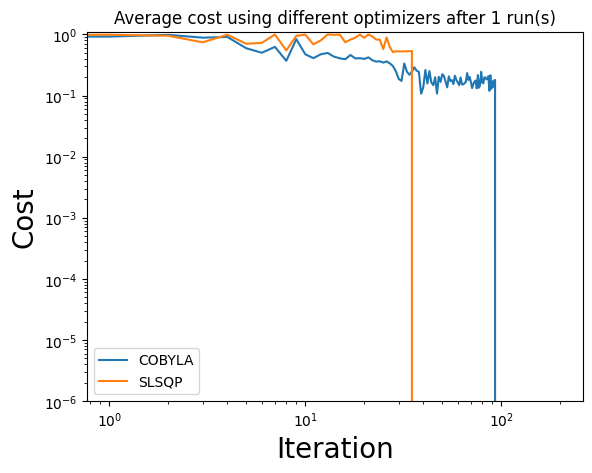

Accuracy with COBYLA: (0.8268562458629657-0j)
Accuracy with SLSQP: (0.4691233745601306+0j)


In [45]:
#IND determines whether to print each graph individually
IND = False

for i in range(len(optimizers)):
    plt.loglog(cost_sum[i]/opt_iter)
    if IND: 
        plt.ylim(math.pow(10,-6))
        plt.legend([optimizers[i]])
        plt.show()

plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)
plt.ylim(math.pow(10,-6))
plt.legend(optimizers)
plt.title("Average cost using different optimizers after " + str(opt_iter) + " run(s)")

# Seed:
print("Starting  with k = : " + str(k))
plt.show()

for i in range(len(optimizers)):
    print("Accuracy with " + optimizers[i] + ": " + str(accuracy[i]))